In [5]:
library(tidyverse)
library(httr2)
library(jsonlite)

In [7]:
player_url <- "https://ch.tetr.io/api/users/2hp/records/league/recent"

In [39]:
req <- request(player_url)
resp <- req |> req_perform()
resp_json <- resp |> resp_body_string()

In [401]:
json_data <- fromJSON(resp_json)
json_data_frame <- as.data.frame(json_data)|>
        flatten()|>
        select('data.entries._id','data.entries.replayid','data.entries.results.leaderboard','data.entries.extras.result')|>
        unnest(data.entries.results.leaderboard)|>
        unnest(stats)|>
        select(!c(shadows,shadowedBy,data.entries.replayid,id))|>
        mutate( player = ifelse(username == "2hp", "player0", "player1"))|>
        pivot_wider(id_cols = data.entries._id,
                     names_from = player,
                     values_from = username:data.entries.extras.result) 
        

In [402]:
colnames(json_data_frame)

[1] "data.entries._id"                   "username_player1"                  
 [3] "username_player0"                   "active_player1"                    
 [5] "active_player0"                     "naturalorder_player1"              
 [7] "naturalorder_player0"               "wins_player1"                      
 [9] "wins_player0"                       "apm_player1"                       
[11] "apm_player0"                        "pps_player1"                       
[13] "pps_player0"                        "vsscore_player1"                   
[15] "vsscore_player0"                    "garbagesent_player1"               
[17] "garbagesent_player0"                "garbagereceived_player1"           
[19] "garbagereceived_player0"            "kills_player1"                     
[21] "kills_player0"                      "altitude_player1"                  
[23] "altitude_player0"                   "rank_player1"                      
[25] "rank_player0"                       "targetingfactor_player1"           
[27] "targetingfactor_player0"            "targetinggrace_player1"            
[29] "targetinggrace_player0"             "btb_player1"                       
[31] "btb_player0"                        "revives_player1"                   
[33] "revives_player0"                    "data.entries.extras.result_player1"
[35] "data.entries.extras.result_player0"

In [405]:
important_stats_data_frame <- json_data_frame|>
    

data.entries._id,username_player1,username_player0,active_player1,active_player0,naturalorder_player1,naturalorder_player0,wins_player1,wins_player0,apm_player1,⋯,targetingfactor_player1,targetingfactor_player0,targetinggrace_player1,targetinggrace_player0,btb_player1,btb_player0,revives_player1,revives_player0,data.entries.extras.result_player1,data.entries.extras.result_player0
<chr>,<chr>,<chr>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
67b1435c8eb697a6949b479f,yu00231,2hp,TRUE,TRUE,1,0,7,3,78.99575,⋯,30,30,0,0,16,11,0,0,defeat,defeat
67b1405e9e066c8f8b1bc730,x250,2hp,TRUE,TRUE,0,1,1,5,76.96140,⋯,18,18,0,0,0,10,0,0,victory,victory
67b13ec9be4c79cddfeaedd8,fireballstarfish,2hp,TRUE,TRUE,0,1,0,5,65.32488,⋯,15,15,0,0,0,10,0,0,victory,victory
67afcdd7a1fd42fda774fdcd,pludee,2hp,TRUE,TRUE,1,0,6,7,75.52029,⋯,39,39,0,0,11,16,0,0,victory,victory
67afc9d19cc25eb463ef0162,redstackerred,2hp,TRUE,TRUE,1,0,7,5,84.36730,⋯,36,36,0,0,26,3,0,0,defeat,defeat
67afc681a0e90cd73f2ba82e,eponym,2hp,TRUE,TRUE,0,1,5,3,82.94476,⋯,24,24,0,0,6,5,0,0,defeat,defeat


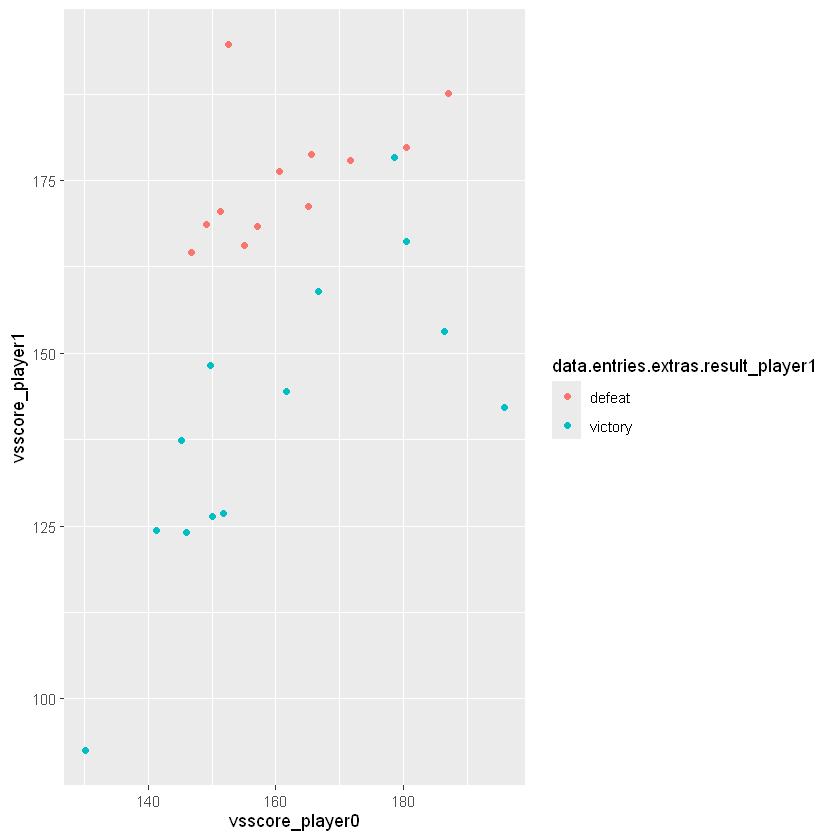

In [410]:
ggplot( json_data_frame, aes(x = vsscore_player0, y = vsscore_player1, color = 	data.entries.extras.result_player1))+
geom_point()